In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sqlalchemy import create_engine, text
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import dvc.api, dvc.repo
import io
sns.set(rc={'figure.figsize':(11,6)})
pd.set_option('display.max_columns', None)

In [2]:
url = "https://github.com/mostafa-fallaha/heart-disease-prediction.git"
data = dvc.api.read("ETL/dvc_data/data/heart_data.csv", repo=url)
df = pd.read_csv(io.StringIO(data))

In [3]:
df.rename(columns={'state_code':'state', 'gender_id': 'gender', 'general_health_id':'general_health',
                                    'last_checkup_time_id':'last_checkup_time', 'removed_teeth_id':'removed_teeth',
                                    'diabetes_status_id':'diabetes_status', 'smoking_status_id':'smoking_status',
                                    'e_cigarette_usage_id':'e_cigarette_usage', 'race_ethnicity_category_id':'race_ethnicity_category',
                                    'age_category_id':'age_category', 'tetanus_last_10_tdap_id':'tetanus_last_10_tdap',
                                    'covid_pos_id':'covid_pos'}, inplace=True)

In [4]:
df.head()

,id,survey_date,diagnose_date,state,gender,general_health,physical_health_days,mental_health_days,last_checkup_time,physical_activities,sleep_hours,removed_teeth,had_heart_attack,had_angina,had_stroke,had_asthma,had_skin_cancer,had_copd,had_depressive_disorder,had_kidney_disease,had_arthritis,diabetes_status,deaf_or_hard_of_hearing,blind_or_vision_difficulity,difficulty_concentrating,difficulty_walking,difficulty_dressing_bathing,difficulty_errands,smoking_status,e_cigarette_usage,chest_scan,race_ethnicity_category,age_category,height_in_meters,weight_in_kilograms,bmi,alcohol_drinkers,hiv_testing,flu_vax_last_12,pneumo_vax_ever,tetanus_last_10_tdap,high_risk_last_year,covid_pos
0,1,2022-02-03,2021-10-09 16:44:59.495544232,1.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,13.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,3.0,0.0,2.0
1,2,2022-02-04,2014-04-07 13:08:10.292099224,1.0,2.0,1.0,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,13.0,1.60,68.04,26.57,0.0,0.0,0.0,0.0,4.0,0.0,2.0
2,3,2022-02-02,2021-11-29 20:40:09.401491096,1.0,2.0,2.0,2.0,3.0,1.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,8.0,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1.0
3,4,2022-02-03,2021-06-20 19:05:36.871097356,1.0,2.0,1.0,0.0,0.0,1.0,1.0,7.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,NaN,1.65,63.50,23.30,0.0,0.0,1.0,1.0,4.0,0.0,2.0
4,5,2022-02-02,2021-08-29 03:25:04.301915228,1.0,2.0,4.0,2.0,0.0,1.0,1.0,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,5.0,1.57,53.98,21.77,1.0,0.0,0.0,1.0,4.0,0.0,2.0


In [5]:
df['diagnose_date'] = pd.to_datetime(df['diagnose_date'])

In [6]:
df_copy = df.copy()

In [7]:
df_copy = df_copy.set_index('diagnose_date')

In [8]:
df_copy.head()

,id,survey_date,state,gender,general_health,physical_health_days,mental_health_days,last_checkup_time,physical_activities,sleep_hours,removed_teeth,had_heart_attack,had_angina,had_stroke,had_asthma,had_skin_cancer,had_copd,had_depressive_disorder,had_kidney_disease,had_arthritis,diabetes_status,deaf_or_hard_of_hearing,blind_or_vision_difficulity,difficulty_concentrating,difficulty_walking,difficulty_dressing_bathing,difficulty_errands,smoking_status,e_cigarette_usage,chest_scan,race_ethnicity_category,age_category,height_in_meters,weight_in_kilograms,bmi,alcohol_drinkers,hiv_testing,flu_vax_last_12,pneumo_vax_ever,tetanus_last_10_tdap,high_risk_last_year,covid_pos
diagnose_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-09 16:44:59.495544232,1,2022-02-03,1.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,13.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,3.0,0.0,2.0
2014-04-07 13:08:10.292099224,2,2022-02-04,1.0,2.0,1.0,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,13.0,1.60,68.04,26.57,0.0,0.0,0.0,0.0,4.0,0.0,2.0
2021-11-29 20:40:09.401491096,3,2022-02-02,1.0,2.0,2.0,2.0,3.0,1.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,8.0,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,1.0
2021-06-20 19:05:36.871097356,4,2022-02-03,1.0,2.0,1.0,0.0,0.0,1.0,1.0,7.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,NaN,1.65,63.50,23.30,0.0,0.0,1.0,1.0,4.0,0.0,2.0
2021-08-29 03:25:04.301915228,5,2022-02-02,1.0,2.0,4.0,2.0,0.0,1.0,1.0,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,5.0,1.57,53.98,21.77,1.0,0.0,0.0,1.0,4.0,0.0,2.0


## Sampling the data by month

In [72]:
df_M_sample = pd.DataFrame(df_copy.loc[df_copy['had_heart_attack'] == 1, 'id'].resample('ME').count())

In [73]:
df_M_sample.rename(columns={'id':'nb_of_patients'}, inplace=True)

In [74]:
df_M_sample

,nb_of_patients
diagnose_date,
2012-01-31,15
2012-02-29,13
2012-03-31,12
2012-04-30,10
2012-05-31,11
...,...
2022-10-31,504
2022-11-30,382
2022-12-31,189


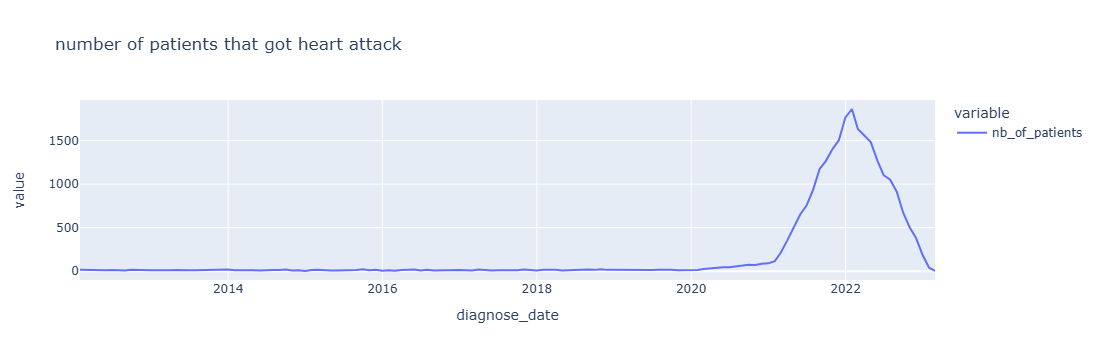

In [75]:
fig = px.line(df_M_sample, title="number of patients that got heart attack")
fig.show()

In [76]:
sorted(df_copy.index.year.unique().to_list())

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [77]:
df_heart_attack = df_copy.loc[df_copy['had_heart_attack'] == 1]
df_heart_attack.shape

(25108, 42)

In [78]:
year_values_dict = {}
for year in sorted(df_copy.index.year.unique().to_list()):
    year_values_dict[year] = df_copy.loc[str(year)].shape[0]
year_values_df = pd.DataFrame.from_dict(year_values_dict, orient='index', columns=['value'])
year_values_df.reset_index(names='year', inplace=True)
year_values_df

,year,value
0,2012,4846
1,2013,4963
2,2014,4945
3,2015,4905
4,2016,4950
5,2017,6477
6,2018,8335
7,2019,8261
8,2020,22892
9,2021,176150


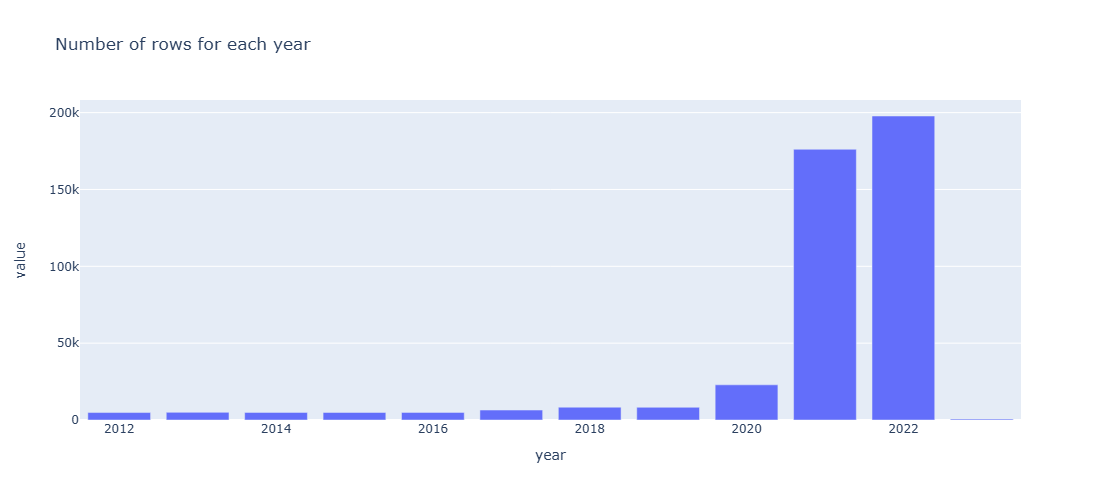

In [79]:
fig = px.bar(year_values_df, y='value', x='year', title='Number of rows for each year')
fig.update_layout(width=1100, height=500)
fig.show()

## Number of people that got a Heart Attack by year

In [58]:
df_Y_sample = pd.DataFrame(df_copy.loc[df_copy['had_heart_attack'] == 1, 'id'].resample('YE').count())

In [59]:
df_Y_sample.rename(columns={'id':'value'}, inplace=True)
df_Y_sample.index = df_Y_sample.index.year
df_Y_sample.reset_index(names='year', inplace=True)
df_Y_sample

,year,value
0,2012,146
1,2013,137
2,2014,130
3,2015,134
4,2016,140
5,2017,134
6,2018,179
7,2019,167
8,2020,633
9,2021,10636


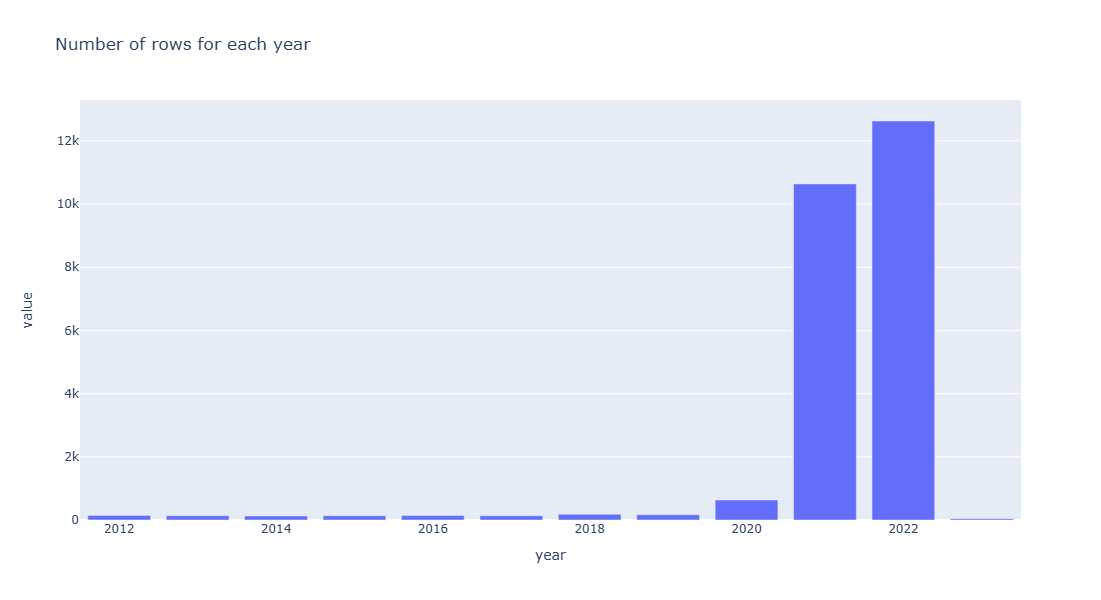

In [62]:
fig = px.bar(df_Y_sample, y='value', x='year', title='Number of rows for each year')
fig.update_layout(width=1100, height=600)
fig.show()

We can see that in our data we have more values for 2021 and 2022. Which means that most of the people who took the survey had their diagnose date between 2021 and 2022.<br>
That's why the number of people that got a heart attack was higher in those 2 years.<br>
But in general, here are the factors that maybe have some relation with that 2021 and 2022 increase:<br>
- Eating more ultra-processed foods and fast food meals
- Less movement and exercise
- Obesity
- Sedentary lifestyle

So, we see that most of the factors are because of the new lifestyle after Covid-19.

## The percentage of people that with a Heart Attack in each year

In [80]:
percentages_df = pd.DataFrame(year_values_df['year'].copy())

In [81]:
percentages_df['value'] = round((df_Y_sample['value'] / year_values_df['value'])*100, 2)

In [82]:
percentages_df

,year,value
0,2012,3.01
1,2013,2.76
2,2014,2.63
3,2015,2.73
4,2016,2.83
5,2017,2.07
6,2018,2.15
7,2019,2.02
8,2020,2.77
9,2021,6.04


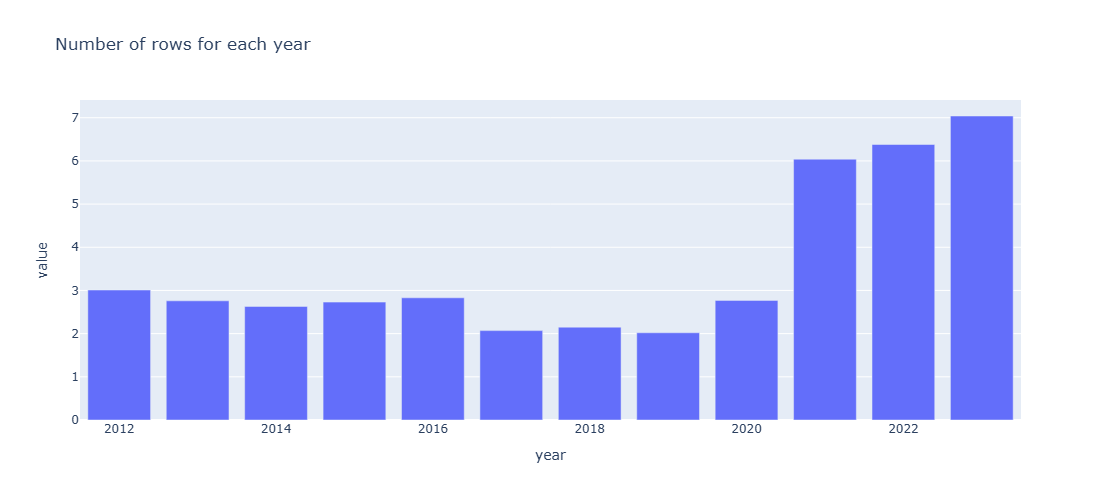

In [83]:
fig = px.bar(percentages_df, y='value', x='year', title='Number of rows for each year')
fig.update_layout(width=1100, height=500)
fig.show()

## Let's see now what's leading to a heart attack in our dataset

In [199]:
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [204]:
df_nonans = df.dropna().reset_index(drop=True)

df_nonans['state'] = df_nonans['state'].astype(int)
df_nonans['gender'] = df_nonans['gender'].astype(int)
df_nonans['general_health'] = df_nonans['general_health'].astype(int)
df_nonans['last_checkup_time'] = df_nonans['last_checkup_time'].astype(int)
df_nonans['removed_teeth'] = df_nonans['removed_teeth'].astype(int)
df_nonans['diabetes_status'] = df_nonans['diabetes_status'].astype(int)
df_nonans['smoking_status'] = df_nonans['smoking_status'].astype(int)
df_nonans['e_cigarette_usage'] = df_nonans['e_cigarette_usage'].astype(int)
df_nonans['race_ethnicity_category'] = df_nonans['race_ethnicity_category'].astype(int)
df_nonans['age_category'] = df_nonans['age_category'].astype(int)
df_nonans['tetanus_last_10_tdap'] = df_nonans['tetanus_last_10_tdap'].astype(int)
df_nonans['covid_pos'] = df_nonans['covid_pos'].astype(int)
df_nonans['mental_health_days'] = df_nonans['mental_health_days'].astype(int)
df_nonans['physical_activities'] = df_nonans['physical_activities'].astype(int)
df_nonans['had_heart_attack'] = df_nonans['had_heart_attack'].astype(int)
df_nonans['had_angina'] = df_nonans['had_angina'].astype(int)
df_nonans['had_stroke'] = df_nonans['had_stroke'].astype(int)
df_nonans['had_asthma'] = df_nonans['had_asthma'].astype(int)
df_nonans['had_skin_cancer'] = df_nonans['had_skin_cancer'].astype(int)
df_nonans['had_copd'] = df_nonans['had_copd'].astype(int)
df_nonans['had_depressive_disorder'] = df_nonans['had_depressive_disorder'].astype(int)
df_nonans['had_kidney_disease'] = df_nonans['had_kidney_disease'].astype(int)
df_nonans['had_arthritis'] = df_nonans['had_arthritis'].astype(int)
df_nonans['deaf_or_hard_of_hearing'] = df_nonans['deaf_or_hard_of_hearing'].astype(int)
df_nonans['blind_or_vision_difficulity'] = df_nonans['blind_or_vision_difficulity'].astype(int)
df_nonans['difficulty_concentrating'] = df_nonans['difficulty_concentrating'].astype(int)
df_nonans['difficulty_walking'] = df_nonans['difficulty_walking'].astype(int)
df_nonans['difficulty_dressing_bathing'] = df_nonans['difficulty_dressing_bathing'].astype(int)
df_nonans['difficulty_errands'] = df_nonans['difficulty_errands'].astype(int)
df_nonans['chest_scan'] = df_nonans['chest_scan'].astype(int)
df_nonans['alcohol_drinkers'] = df_nonans['alcohol_drinkers'].astype(int)
df_nonans['hiv_testing'] = df_nonans['hiv_testing'].astype(int)
df_nonans['flu_vax_last_12'] = df_nonans['flu_vax_last_12'].astype(int)
df_nonans['pneumo_vax_ever'] = df_nonans['pneumo_vax_ever'].astype(int)
df_nonans['high_risk_last_year'] = df_nonans['high_risk_last_year'].astype(int)

df_nonans = pd.DataFrame(df_nonans.drop(columns={'id', 'state', 'survey_date', 'diagnose_date'}, axis=1))

In [205]:
chi_dict = {}
for col in df_nonans.columns:
    contingency_table = pd.crosstab(df_nonans[col], df_nonans['had_heart_attack'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_dict[col] = chi2

chi_df = pd.DataFrame.from_dict(chi_dict, orient='index', columns=['chi_score']).sort_values(by='chi_score', ascending=False)

model = RandomForestClassifier()
thresholds = [1000, 1500, 2000, 5000]
best_score = 0
best_threshold = 0

for threshold in thresholds:
    selected_features = chi_df[chi_df['chi_score'] > threshold].index.to_list()
    df_model = df_nonans[selected_features]

    X = df_model.drop(columns=['had_heart_attack'])
    y = df_model['had_heart_attack']
    
    scores = cross_val_score(model, X, y, cv=5)
    avg_score = scores.mean()
    
    if avg_score > best_score:
        best_score = avg_score
        best_threshold = threshold
print(best_threshold)

1000


In [206]:
chi_df = chi_df.loc[chi_df['chi_score'] >= best_threshold]
chi_df = chi_df.loc[(chi_df.index != 'weight_in_kilograms') & (chi_df.index != 'last_checkup_time') & (chi_df.index != 'had_heart_attack')]
chi_df.reset_index(names='factors', inplace=True)
chi_df.head()

,factors,chi_score
0,had_angina,49200.982615
1,general_health,10018.320361
2,age_category,7944.772962
3,had_stroke,7804.520470
4,removed_teeth,7077.348695


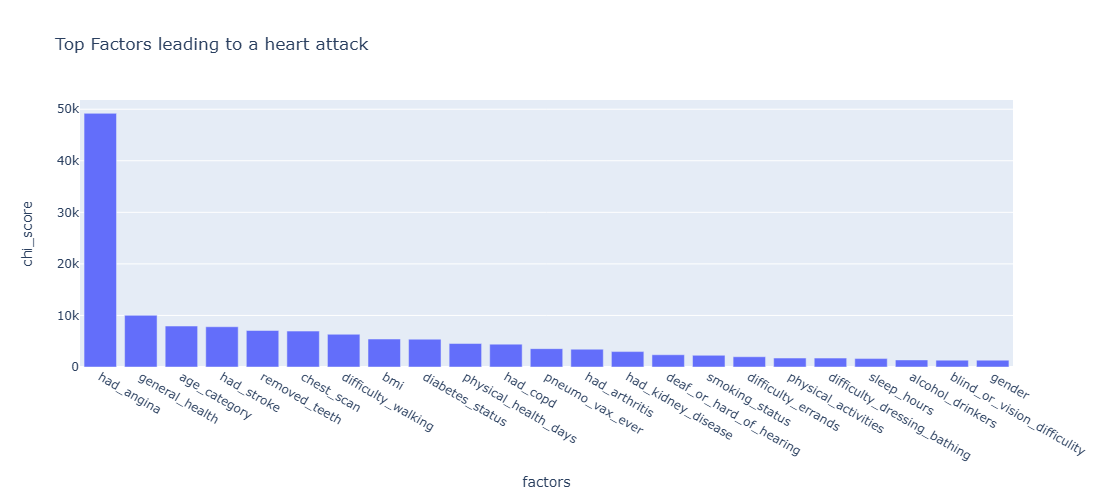

In [207]:
fig = px.bar(chi_df, y='chi_score', x='factors', title='Top Factors leading to a heart attack')
fig.update_layout(width=1100, height=500)
fig.show()